In [3]:
%matplotlib inline

# import resource 
# resource.setrlimit(resource.RLIMIT_NOFILE, (1000, -1))
# import basic functionality / libs
import sys
import os
import numpy as np
import pandas as pd
import json
import scipy
import pickle

# Import magic commands for jupyter notebook 
# - autoreloading a module
# - profiling functions for memory usage and scripts
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

sys.path.append('../../')
# import fragility related modules
import dnn
from dnn.base.utils.log_error import initialize_logger
from dnn.base.constants.config import Config
# from dnn.io.loadsimdataset import LoadSimDataset
# from dnn.io.loadresults import LoadResults

# import basic plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# set configurations
patient = 'id001_bt'
patients = ['id001_ac', 'id002_cj', 'id008_gc', 'id010_js', 
            'id011_ml', 'id012_pc', 'id013_pg']
patient = 'id013_pg'
output_folder = os.path.join(os.path.expanduser("~"), 'Documents', 'figures', 
        'exp001_newtng_dnn', patient)

# where to find the raw data for this patient
rawdatadir = os.path.join('/Volumes/ADAM LI/rawdata/old/',  patient)

# which experimental set up do we want to compare with?
expname = 'exp001'

# real data results directory
resultsdir = os.path.join('/Volumes/ADAM LI/pydata/', 'dnn/output/', expname, patient)
resultsdir = os.path.join('/Users/adam2392/Downloads/', expname, patient)

# configuration and plotting
config = Config(output_base=output_folder) 
config.figures.MATPLOTLIB_BACKEND="qt5" #"Qt4Agg" #"inline"
config.figures.SHOW_FLAG=True

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [26]:
output_folder = os.path.join(os.path.expanduser("~"), 'Documents', 'figures', 
        'newtng_baseline_dnn')
expname = 'exp001'
print(expname)
patients = [
        'id001_bt',
    'id002_sd',
    'id003_mg',
    'id004_bj', 'id005_ft',
    'id006_mr', 'id007_rd', 'id008_dmc',
    'id009_ba', 'id010_cmn', 'id011_gr',
    'id013_lk', 'id014_vc', 'id015_gjl',
    'id016_lm', 'id017_mk', 'id018_lo', 'id020_lma']

loss = np.zeros((len(patients), 150))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)
lr = np.zeros(loss.shape)
auc = np.zeros(loss.shape)
fpr = np.zeros(loss.shape)
tpr = np.zeros(loss.shape)

val_metrics = train_metrics = {
    'loss': np.zeros(loss.shape),
    'accuracy': np.zeros(loss.shape),
    'precision': np.zeros(loss.shape),
    'recall': np.zeros(loss.shape),
    'fp': np.zeros(loss.shape),
    'tpr': np.zeros(loss.shape),
    'thresholds': np.zeros(loss.shape),
    'auc': np.zeros(loss.shape)
}
patlist = []
# go through all patients
for idx, patient in enumerate(patients):
    # real data results directory
#     resultsdir = os.path.join('/Volumes/ADAM LI/pydata/dnn/output/', expname, pat,
#                              'output')
    resultsdir = os.path.join('/Users/adam2392/Downloads/', expname, patient, 'output')
    histfile = os.path.join(resultsdir, 'loobasecnn_history.pkl')
    metricsfile = os.path.join(resultsdir, 'loobasecnn_metrics.json')
    
    # extract data from each training session
    # load in the history file
    with open(histfile, "rb") as f:
        history = pickle.load(f)
#     print(history.keys())
    val_acc[idx,:] = history['val_acc']
    acc[idx,:] = history['acc']
    val_loss[idx,:] = history['val_loss']
    loss[idx,:] = history['loss']
    lr[idx,:] = history['lr']
    patlist.append(patient)
    
    # extract data from metrics
    with open(metricsfile, 'rb') as f:
        metrics = json.load(f)
    auc[idx,:] = metrics['auc']
    fpr[idx,:] = metrics['fpr'][0]
    tpr[idx,:] = metrics['tpr']
    print(metrics.keys())

exp001


ValueError: cannot copy sequence with size 367 to array axis with dimension 150

In [30]:
fpr = metrics['fpr']


367


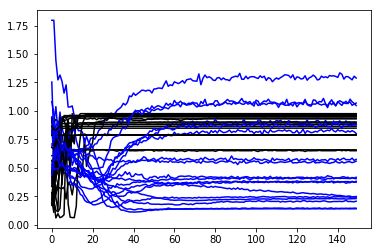

done


In [14]:
toplot = [val_acc, val_loss,]
plt.figure()
for i in range(len(patlist)):
    plt.plot(val_acc[i,:], 'k')
    plt.plot(val_loss[i,:], 'b')
plt.show()

print("done")

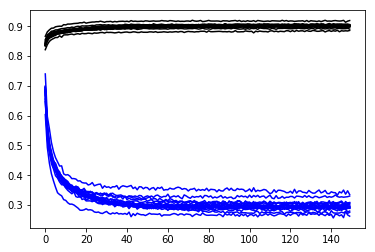

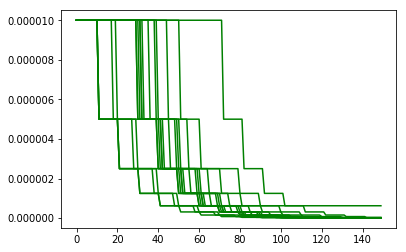

done


In [18]:
toplot = [acc, loss,]
plt.figure()
for i in range(len(patlist)):
    plt.plot(acc[i,:], 'k')
    plt.plot(loss[i,:], 'b')
plt.show()

plt.figure()
for i in range(len(patlist)):
    plt.plot(lr[i,:], 'g-')
plt.show()
print("done")

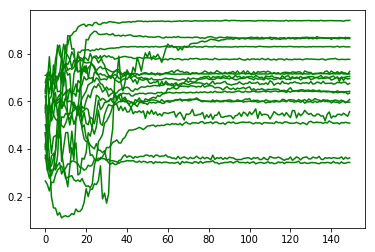

done


In [20]:
toplot = [val_acc, val_loss,]
plt.figure()
for i in range(len(patlist)):
#     plt.plot(fpr[i,:], 'k')
#     plt.plot(tpr[i,:], 'b')
    plt.plot(auc[i,:], 'g')
plt.show()

print("done")

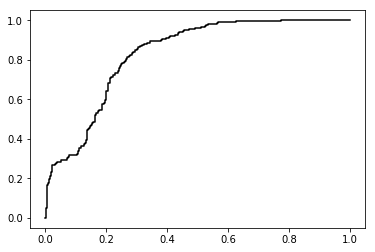

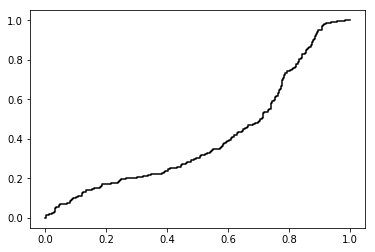

In [37]:
fpr = metrics['fpr'][-1]
tpr = metrics['tpr'][-1]
thresholds = metrics['thresholds'][-1]

plt.figure()
plt.plot(fpr, tpr, 'k')
plt.show()

fpr = metrics['fpr'][0]
tpr = metrics['tpr'][0]
thresholds = metrics['thresholds'][0]

plt.figure()
plt.plot(fpr, tpr, 'k')
plt.show()